<a href="https://colab.research.google.com/github/RaeesFatima/Web-scrapping/blob/main/Specialties_and_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 26.5 MB/s eta 0:00:00


In [ ]:
!pip install webdriver-manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

In [ ]:
options = Options()
options.add_argument('--headless')  # Run in headless mode
options.add_argument('--no-sandbox')  # Required for Colab
options.add_argument('--disable-dev-shm-usage')  # Overcome limited resources

In [ ]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y

--2024-12-25 12:22:28--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 172.217.203.190, 172.217.203.91, 172.217.203.93, ...
Connecting to dl.google.com (dl.google.com)|172.217.203.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112770956 (108M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 107.55M   316MB/s    in 0.3s    

2024-12-25 12:22:28 (316 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [112770956/112770956]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (131.0.6778.204-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Packa

In [ ]:
!which google-chrome

/usr/bin/google-chrome


Element Text: Saleem Memorial Hospital
Saleem Memorial Hospital, Satluj Block, Green Forts 2, Lahore
See on map
Image URL: https://d1t78adged64l7.cloudfront.net/images/profile-pics/hospitals/1699276009_saleem-memorial-hospital.webp


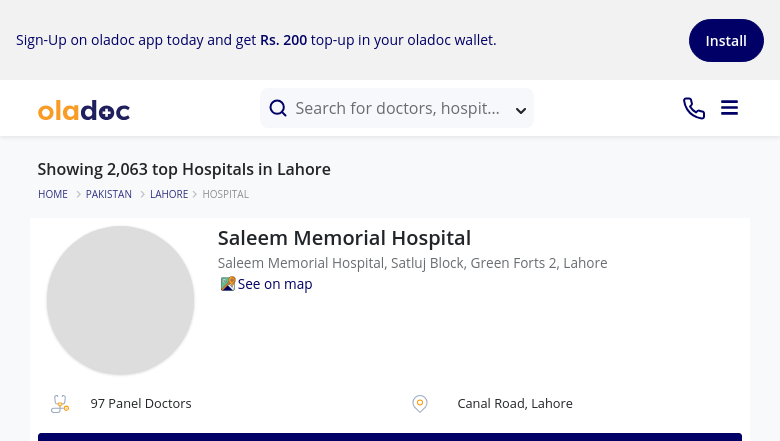

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
# Set up Chrome in headless mode
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = "/usr/bin/google-chrome"  # Explicitly set the Chrome binary location

# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    # Perform actions

    driver.get("https://oladoc.com/pakistan/lahore/hospital")  # Replace with your URL
    # print("Please solve the CAPTCHA manually if prompted.")
    # time.sleep(60)
    parent_element = driver.find_element(By.CSS_SELECTOR, ".row.css-row-picture-name")

    # Get the text from the parent element
    text = parent_element.text
    print("Element Text:", text)

    # Locate the <img> tag inside the parent element
    image_element = parent_element.find_element(By.TAG_NAME, "img")

    # Extract the image URL from the 'src' attribute
    image_url = image_element.get_attribute("src")
    print("Image URL:", image_url)
    # print("Opened Google, title:", driver.title)

    driver.save_screenshot('screenshot.png')
    from IPython.display import Image, display
    display(Image('screenshot.png'))
finally:
    # Quit the driver
    driver.quit()

In [ ]:
 # Pause for enough time to solve CAPTCHA


MaxRetryError: HTTPConnectionPool(host='localhost', port=57839): Max retries exceeded with url: /session/c31462caa2a38d5a616f9d15c53fdbfb/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7e8addfd46a0>: Failed to establish a new connection: [Errno 111] Connection refused'))

Opened Google, title: Find Verified Doctors in Pakistan | Book Online Appointment | oladoc.com
Data saved to specialists.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

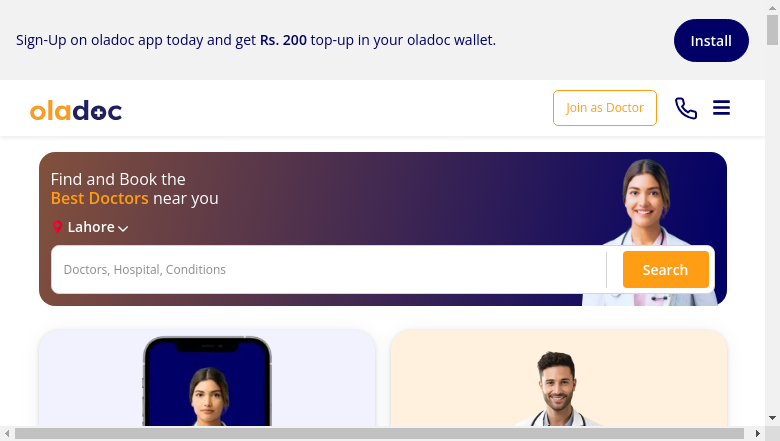

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
# Set up Chrome in headless mode
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = "/usr/bin/google-chrome"  # Explicitly set the Chrome binary location
import json
# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    # Perform actions


    driver.get("https://oladoc.com/")  # Replace with your URL
    extracted_data = []
    print("Opened Google, title:", driver.title)
    parent_element = driver.find_element(By.CSS_SELECTOR, ".doc-list")
    child_elements = parent_element.find_elements(By.CSS_SELECTOR, ".doc-list-item")
    for index, child in enumerate(child_elements):
        # Data for this child
        child_data = {
            "id": index + 1,  # Add ID starting from 1
            "text": "",
            "images": []
        }

        # Get text content of the child element
        child_data["text"] = child.text

        # Get all image elements within the child
        image_elements = child.find_elements(By.TAG_NAME, "img")
        for img in image_elements:
            # Extract the image URL
            image_url = img.get_attribute("data-src") or img.get_attribute("src")
            if image_url:
                child_data["images"].append(image_url)

        # Append this child's data to the main list
        extracted_data.append(child_data)

    # Save extracted data to JSON
    json_filename = "specialists.json"
    with open(json_filename, "w") as json_file:
        json.dump(extracted_data, json_file, indent=4)

    print(f"Data saved to {json_filename}")

    # Download the file in Google Colab
    from google.colab import files
    files.download(json_filename)

    driver.save_screenshot('screenshot.png')
    from IPython.display import Image, display
    display(Image('screenshot.png'))
finally:
    # Quit the driver
    driver.quit()

    # doc-list-img


Opened Google, title: Just a moment...


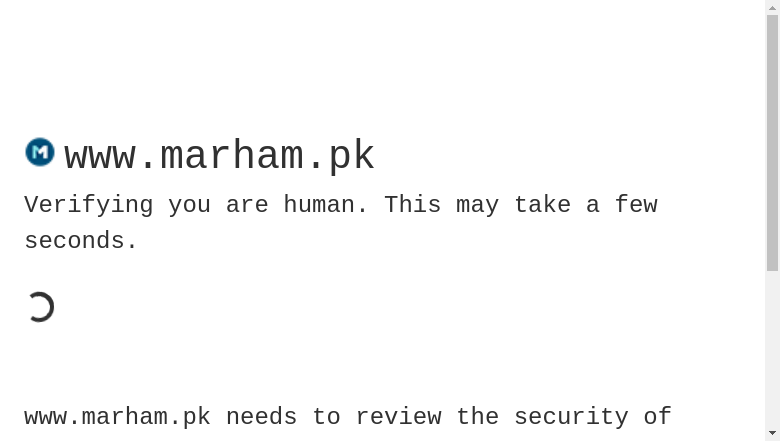

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
# Set up Chrome in headless mode
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = "/usr/bin/google-chrome"  # Explicitly set the Chrome binary location
import json
# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

try:
    # Perform actions


    driver.get("https://www.marham.pk/all-diseases")  # Replace with your URL
    extracted_data = []
    print("Opened Google, title:", driver.title)

    driver.save_screenshot('screenshot.png')
    from IPython.display import Image, display
    display(Image('screenshot.png'))
finally:
    # Quit the driver
    driver.quit()

    # doc-list-img
